In [1]:
import pandas as pd

# Load the marketing dataset and display its structure
df = pd.read_csv('marketing_data.csv')
print(df.head())

   annual_spending  frequency  campaign_success  churn
0          2750.16         12                 0      0
1          4982.45         18                 1      0
2          1345.67          5                 0      1
3          3897.23         10                 1      0
4          2567.89          8                 0      1


In [2]:
# Generate summary statistics of the dataset
print(df.describe())

       annual_spending  frequency  campaign_success     churn
count         5.000000   5.000000          5.000000  5.000000
mean       3108.680000  10.600000          0.400000  0.400000
std        1384.017683   4.878524          0.547723  0.547723
min        1345.670000   5.000000          0.000000  0.000000
25%        2567.890000   8.000000          0.000000  0.000000
50%        2750.160000  10.000000          0.000000  0.000000
75%        3897.230000  12.000000          1.000000  1.000000
max        4982.450000  18.000000          1.000000  1.000000


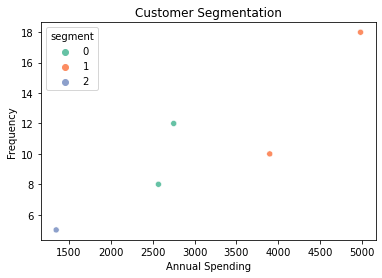

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Segment customers based on their spending behavior
X = df[['annual_spending', 'frequency']]
kmeans = KMeans(n_clusters=3)
df['segment'] = kmeans.fit_predict(X)

# Plotting the customer segmentation
sns.scatterplot(x='annual_spending', y='frequency', hue='segment', data=df, palette='Set2')
plt.title("Customer Segmentation")
plt.xlabel("Annual Spending")
plt.ylabel("Frequency")
plt.show()

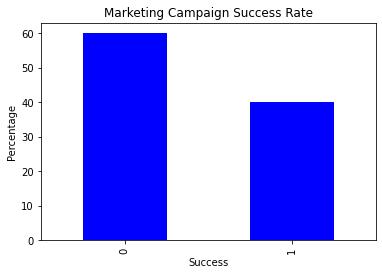

In [5]:
# Analyze the success rate of a marketing campaign
campaign_success_rate = df['campaign_success'].value_counts(normalize=True) * 100

# Plotting the success rate of the marketing campaign
campaign_success_rate.plot(kind='bar', color='blue')
plt.title("Marketing Campaign Success Rate")
plt.xlabel("Success")
plt.ylabel("Percentage")
plt.show()

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Build a logistic regression model to predict customer churn
X = df.drop('churn', axis=1)  # Assuming 'churn' is the target column
y = df['churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Predicting churn and calculating accuracy
y_pred = model.predict(X_test)
print("Accuracy of Churn Prediction Model:", accuracy_score(y_test, y_pred))

Accuracy of Churn Prediction Model: 1.0
